# Problem Statement

This Data is amount spent on advertising through different channels like TV, Radio and Newspaper.The Goal is to predict how the expense on each channel affects the sales and there a way to optimise the sales?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

# Importing dataset

In [3]:
data = pd.read_csv("Advertising.csv")

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### What are Features?
Tv : Amount spent on TV

Radio: Amount spent on Radio

Newspaper : Amount spent on Newspaper


### What is label ?
Sales: Sales of a single product in a given market

# Shape of Dataset

In [5]:
data.shape


(200, 5)

In [6]:
data.info() # Printing the summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


 Unnamed column is not required and we can drop it

In [7]:
data = data.drop(['Unnamed: 0'],axis=1)

# Describing the Data

In [8]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Checking Null Values

In [10]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Checking the Datatype of columns

In [11]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

### Lets find the zero values for radio

In [12]:
data.loc[data['radio']== 0]

,TV,radio,newspaper,sales
127,80.2,0.0,9.2,8.8


Here we can see that radio sale is 0 but TV and newspaper sale has happened so total sales also increased

# Lets see the relationship between the features and the label using scatterplots

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

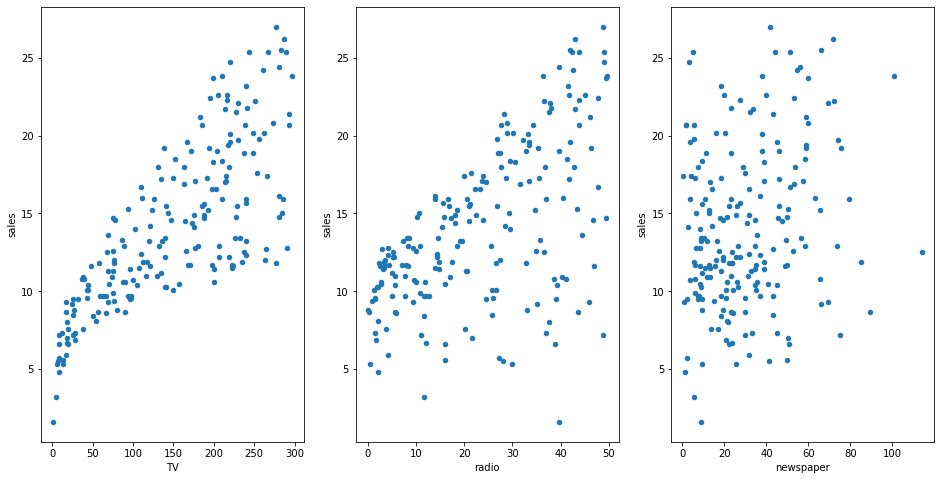

In [13]:
fig, axs= plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

# Describing the Data using heatmap

<AxesSubplot:>

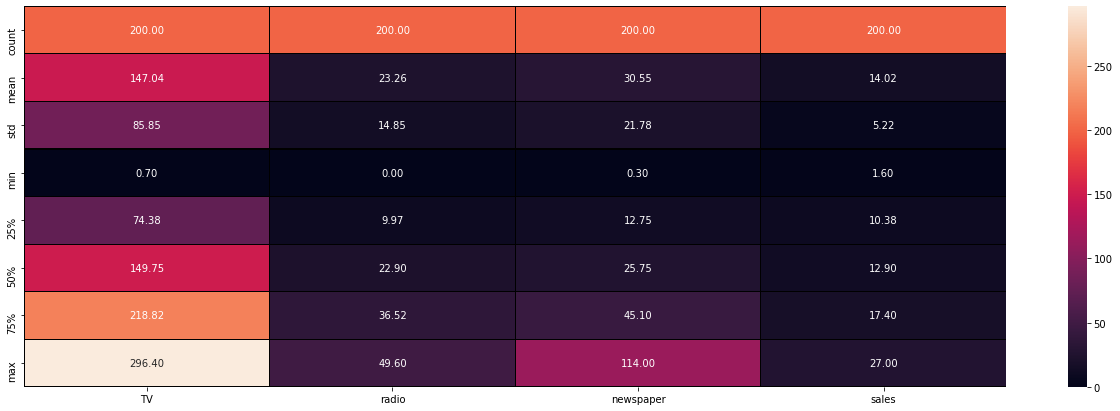

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

# Correlation of the columns with the target columns :


In [15]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

# Lets check the Skewness

In [16]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Keeping +/-0.5 as range of skewness, here are the columns which does not lie within the Range


Sales - target variable

TV is in between range

Radio is in between range

Newspaper is slightly positively skewed

# Outliers Check

In [17]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:>

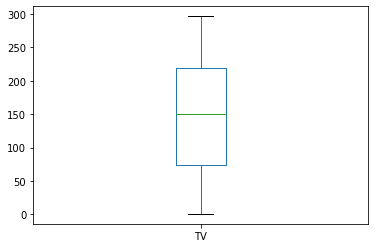

In [18]:
data['TV'].plot.box()

<AxesSubplot:>

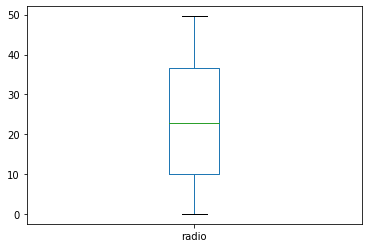

In [19]:
 data['radio'].plot.box()

<AxesSubplot:>

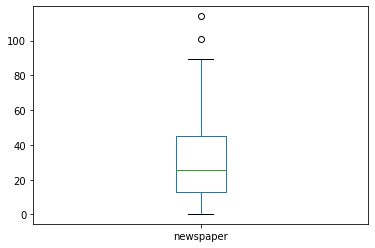

In [20]:
 data['newspaper'].plot.box()

# Considering the Outlier removal

In [21]:
data.shape

(200, 4)

In [22]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(data))
threshold =3 
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [23]:
data_new_z = data[(z<3).all(axis=1)]
data_new_z

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [24]:
data_new_z.shape

(198, 4)

# Percentage of Loss of data:

In [25]:
data_loss = ((200-198)/200)*100

In [26]:
data_loss

1.0

around 1% of Data has been loss.

In [27]:
data_new_z.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Now we can see that skewness is reduced

# Seperating the columns into features and target :

In [28]:
features = data.drop(["sales"],axis=1)
target = data["sales"]

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [30]:
rr1_max =0
rr2_max = 0
for i in range(0,120):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.25,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f" At random state{i}, the training accuracy is: {r2_score(target_train,pred_train)}")
    rr1 = r2_score(target_train,pred_train)
    print(f" At random state {i}, the testing accuracy is: {r2_score(target_test,pred_test)}")
    rr2 = r2_score(target_test,pred_test)
    print("\n")

 At random state0, the training accuracy is: 0.9072183330817297
 At random state 0, the testing accuracy is: 0.8576396745320892


 At random state1, the training accuracy is: 0.890307557755665
 At random state 1, the testing accuracy is: 0.9156213613792232


 At random state2, the training accuracy is: 0.9322395888715463
 At random state 2, the testing accuracy is: 0.7558194773721318


 At random state3, the training accuracy is: 0.9009381215792123
 At random state 3, the testing accuracy is: 0.8829078884253615


 At random state4, the training accuracy is: 0.8893590351773576
 At random state 4, the testing accuracy is: 0.9157191830180073


 At random state5, the training accuracy is: 0.9002172879046075
 At random state 5, the testing accuracy is: 0.8838181418224292


 At random state6, the training accuracy is: 0.8927531633218303
 At random state 6, the testing accuracy is: 0.9117236844712061


 At random state7, the training accuracy is: 0.8933316510408247
 At random state 7, the tes



 At random state67, the training accuracy is: 0.8988738689681309
 At random state 67, the testing accuracy is: 0.8867958519614397


 At random state68, the training accuracy is: 0.8957409092383819
 At random state 68, the testing accuracy is: 0.8871963829854729


 At random state69, the training accuracy is: 0.8821708825937394
 At random state 69, the testing accuracy is: 0.9288427743492059


 At random state70, the training accuracy is: 0.8886677385730575
 At random state 70, the testing accuracy is: 0.9086686660884564


 At random state71, the training accuracy is: 0.9161189244189819
 At random state 71, the testing accuracy is: 0.8280673461167763


 At random state72, the training accuracy is: 0.892110246399269
 At random state 72, the testing accuracy is: 0.9083391029437632


 At random state73, the training accuracy is: 0.9118827424311392
 At random state 73, the testing accuracy is: 0.8383891745736054


 At random state74, the training accuracy is: 0.8979045646881902
 At random

We will take 101 as random state as it is giving best accuracy for train and test data

In [31]:
features_train,features_test,target_train,target_test= train_test_split(features,target,test_size=0.25, random_state= 101)

In [32]:
lr.fit(features_train,target_train)

LinearRegression()

In [33]:
pred_test = lr.predict(features_test)

In [34]:
print(r2_score(target_test,pred_test))

0.9246764680774093


R2 score is 92%

# Cross Validation of the model

In [35]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print("\n")      

At cross fold 2 the cv score is 0.8908473589845056 and accuracy score for training is -0.8973102944839033 and accuracy for testing is 0.9246764680774093


At cross fold 3 the cv score is 0.8916464591145559 and accuracy score for training is -0.8973102944839033 and accuracy for testing is 0.9246764680774093


At cross fold 4 the cv score is 0.8900070660549506 and accuracy score for training is -0.8973102944839033 and accuracy for testing is 0.9246764680774093


At cross fold 5 the cv score is 0.8871063495438436 and accuracy score for training is -0.8973102944839033 and accuracy for testing is 0.9246764680774093


At cross fold 6 the cv score is 0.8899208882186671 and accuracy score for training is -0.8973102944839033 and accuracy for testing is 0.9246764680774093


At cross fold 7 the cv score is 0.8859930219823539 and accuracy score for training is -0.8973102944839033 and accuracy for testing is 0.9246764680774093


At cross fold 8 the cv score is 0.8826686689919152 and accuracy score 

Since the number of folds don't have such impact on accuracy and cv_score , So CV= 3

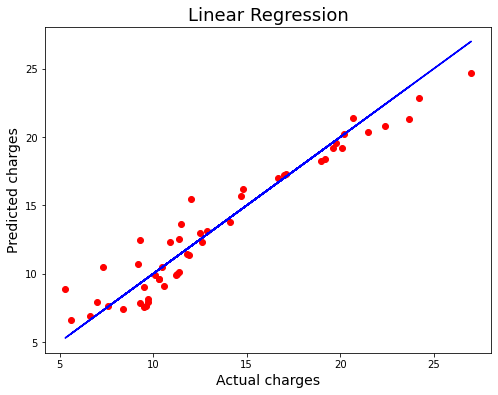

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Linear Regression',fontsize= 18)
plt.show()

# Regularization

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
from sklearn.linear_model import Lasso
parameters = {'alpha': [.0001,.001,.01,.1,1,10,100],'random_state': list(range(0,15))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [39]:
ls = Lasso(alpha=0.001, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
lss= r2_score(target_test,pred_ls)
lss

0.9246771471503615

In [40]:
cv_score= cross_val_score(ls,features,target,cv=2)
cv_mean= cv_score.mean()
cv_mean

0.8908491732139784

# Ensemble technique:

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': [True],'max_depth': [5, 10, None],'criterion': ['mse','mae'],'max_features': ["auto", "sqrt","log2"],'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rf = RandomForestRegressor()

clf = GridSearchCV(rf,parameters,cv=3)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 9}


In [42]:
rf = RandomForestRegressor(criterion="mae",max_features="auto",max_depth= None,n_estimators= 13,bootstrap=True)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score: ',rfs*100)

rfscore= cross_val_score(rf,features,target,cv=2)
rfc = rfscore.mean()
print('Cross Val Score :', rfc*100)

R2 Score:  98.16471766405638
Cross Val Score : 96.71954654804968


# Saving the Model

In [49]:
import pickle
filename = 'advertising_model.pkl'
pickle.dump(rf,open(filename, 'wb'))